# Surface Mass Balance: Time Series 

Import relevant Libaries 

In [ ]:
%pip install pyarrow
%pip install plotly
%pip install feature_engine
%pip update pandas

In [ ]:
# Base libraries
import pandas as pd
import numpy as np
import os
import math as math
import datetime
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

Set WD

In [214]:
import os
from pyrsistent import v
os.getcwd()
os.chdir('/Users/asgerlyngeholst-hansen/Desktop/Thesis/GEUS-Master-Thesis')
#os.chdir('C:\\Users\\nifu18ab\\Desktop\\GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/Master_Thesis')

#### Load KM_L 

In [217]:
df = pd.read_csv('data/promice/preprocessed/daily/KAN_L_daily.csv')

# Time Series

##### Pre-processing

In [218]:
# This bit to only focus on the time where we see Ice Ablation
df = df[df["Ablation"] == True]

In [219]:
df.columns

Index(['index', 'stid', 'Air pressure (upper boom)',
       'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected', 'Albedo',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Cloud cover', 'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)',
       'Precipitation (upper boom) (cumulative solid & liquid) – corrected',
       'Unnamed: 18', 'Surface height from combined measurements', 'Ablation',
       'Surface height from combined measurements DELTA', 'Datetime',
       'Melting Season'],
      dtype='object')

In [220]:
# This bit retrieve the indexes for all melting season categories and remove column from df
for category in ['beginning', 'middle', 'end']:
    exec(f"indices_{category} = df[df['Melting Season'] == '{category}'].index")

df.drop(columns=['Melting Season'], inplace=True) 

In [211]:
df.columns.to_list()

['index',
 'stid',
 'Air pressure (upper boom)',
 'Air temperature (upper boom)',
 'Relative humidity (upper boom) - corrected',
 'Specific humidity (upper boom)',
 'Wind speed (upper boom)',
 'Wind from direction (upper boom)',
 'Downwelling shortwave radiation - corrected',
 'Upwelling shortwave radiation - corrected',
 'Albedo',
 'Downwelling longwave radiation',
 'Upwelling longwave radiation',
 'Cloud cover',
 'Surface temperature',
 'Latent heat flux (upper boom)',
 'Sensible heat flux (upper boom)',
 'Precipitation (upper boom) (cumulative solid & liquid) – corrected',
 'Unnamed: 18',
 'Surface height from combined measurements',
 'Ablation',
 'Surface height from combined measurements DELTA',
 'Datetime']

In [216]:
# This bit to include only relevant columns 

#df = df[[column for column in df.columns if column not in exclude_list]]
#df = df.dropna(axis=1,how='all') 

In [221]:
df.columns

Index(['index', 'stid', 'Air pressure (upper boom)',
       'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected', 'Albedo',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Cloud cover', 'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)',
       'Precipitation (upper boom) (cumulative solid & liquid) – corrected',
       'Unnamed: 18', 'Surface height from combined measurements', 'Ablation',
       'Surface height from combined measurements DELTA', 'Datetime'],
      dtype='object')

In [197]:
#See missing values
pd.set_option('display.max_rows', None)
pd.DataFrame(df.isna().sum(), columns = ["Sum of missing values"])

,Sum of missing values
index,0
stid,0
Air pressure (upper boom),2673
Air temperature (upper boom),2673
Relative humidity (upper boom) - corrected,2673
Specific humidity (upper boom),2675
Wind speed (upper boom),3252
Wind from direction (upper boom),3252
Downwelling shortwave radiation - corrected,5646
Upwelling shortwave radiation - corrected,5646


In [228]:
# This bit to split into Train & Test
from sklearn.model_selection import train_test_split

X= df.loc[:, df.columns != "Surface height from combined measurements"] # All features except y
y=df["Surface height from combined measurements"]

# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=2023, 
                                   test_size=0.3, 
                                   shuffle=True)

### Time series decomposition

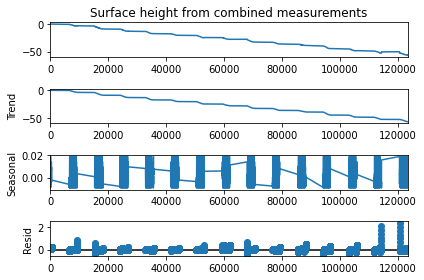

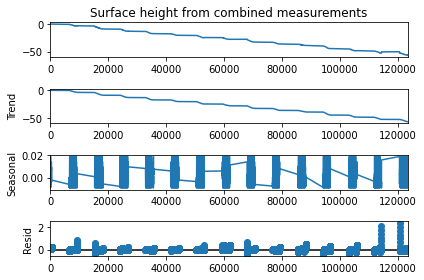

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
result = seasonal_decompose(df["Surface height from combined measurements"], model="additive", period=365)

# Plot the decomposed components
result.plot()

### Cross-correlation analysis

Text(0.5, 1.0, 'Cross-Correlation between Input Variables and Target Variable')

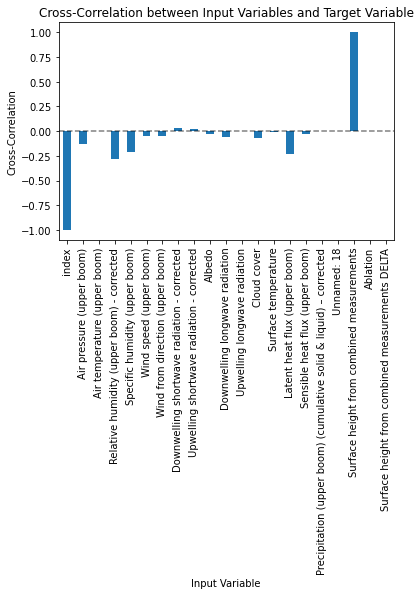

In [230]:
# Explain the results
# The plot shows the cross-correlation values between each input variable and the target variable.
# A positive cross-correlation value indicates a positive relationship between the input variable and the target variable,
# while a negative value indicates a negative relationship. The magnitude of the value indicates the strength of the relationship.
# The plot can be used to identify which input variables have the strongest relationship with the target variable.



# Compute the cross-correlation between each input variable and the target variable
corr = df.corrwith(y)

# Plot the cross-correlation values
fig, ax = plt.subplots()
corr.plot(kind='bar', ax=ax)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax.set_xlabel('Input Variable')
ax.set_ylabel('Cross-Correlation')
ax.set_title('Cross-Correlation between Input Variables and Target Variable')


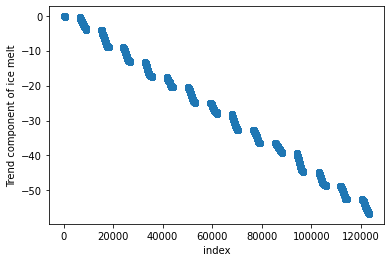

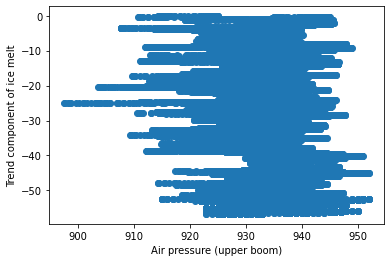

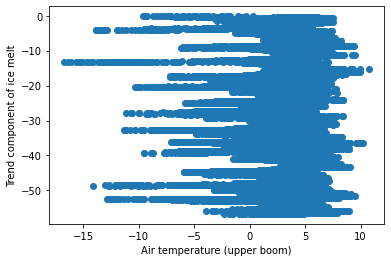

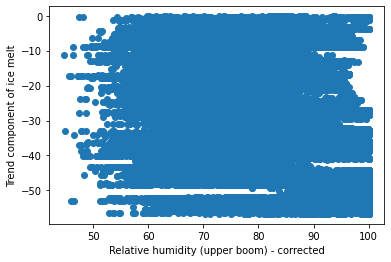

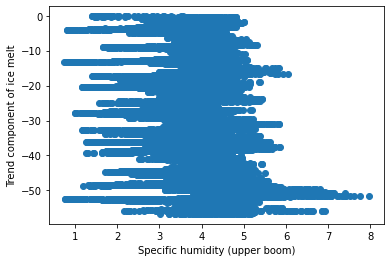

In [231]:
# To visualize the relationship between each input variable and the trend component
# we can create scatter plots with the trend component on the y-axis
# and the input variable on the x-axis. Here is the code to create scatter plots 
# for the top 5 input variables with the highest correlation values:

# Create scatter plots for the top 5 input variables
top_vars = list(corr.keys())[:5]
for var in top_vars:
    plt.scatter(X[var], result.trend)
    plt.xlabel(var)
    plt.ylabel("Trend component of ice melt")
    plt.show()

### Partial correlation analysis

Input variable pairs significantly correlated with the target variable:
Surface height from combined measurements and index
Air temperature (upper boom) and Specific humidity (upper boom)
Air temperature (upper boom) and Albedo
Air temperature (upper boom) and Upwelling longwave radiation
Air temperature (upper boom) and Surface temperature
Air temperature (upper boom) and Sensible heat flux (upper boom)
Relative humidity (upper boom) - corrected and Specific humidity (upper boom)
Cloud cover and Relative humidity (upper boom) - corrected
Latent heat flux (upper boom) and Relative humidity (upper boom) - corrected
Downwelling shortwave radiation - corrected and Upwelling shortwave radiation - corrected
Cloud cover and Downwelling longwave radiation


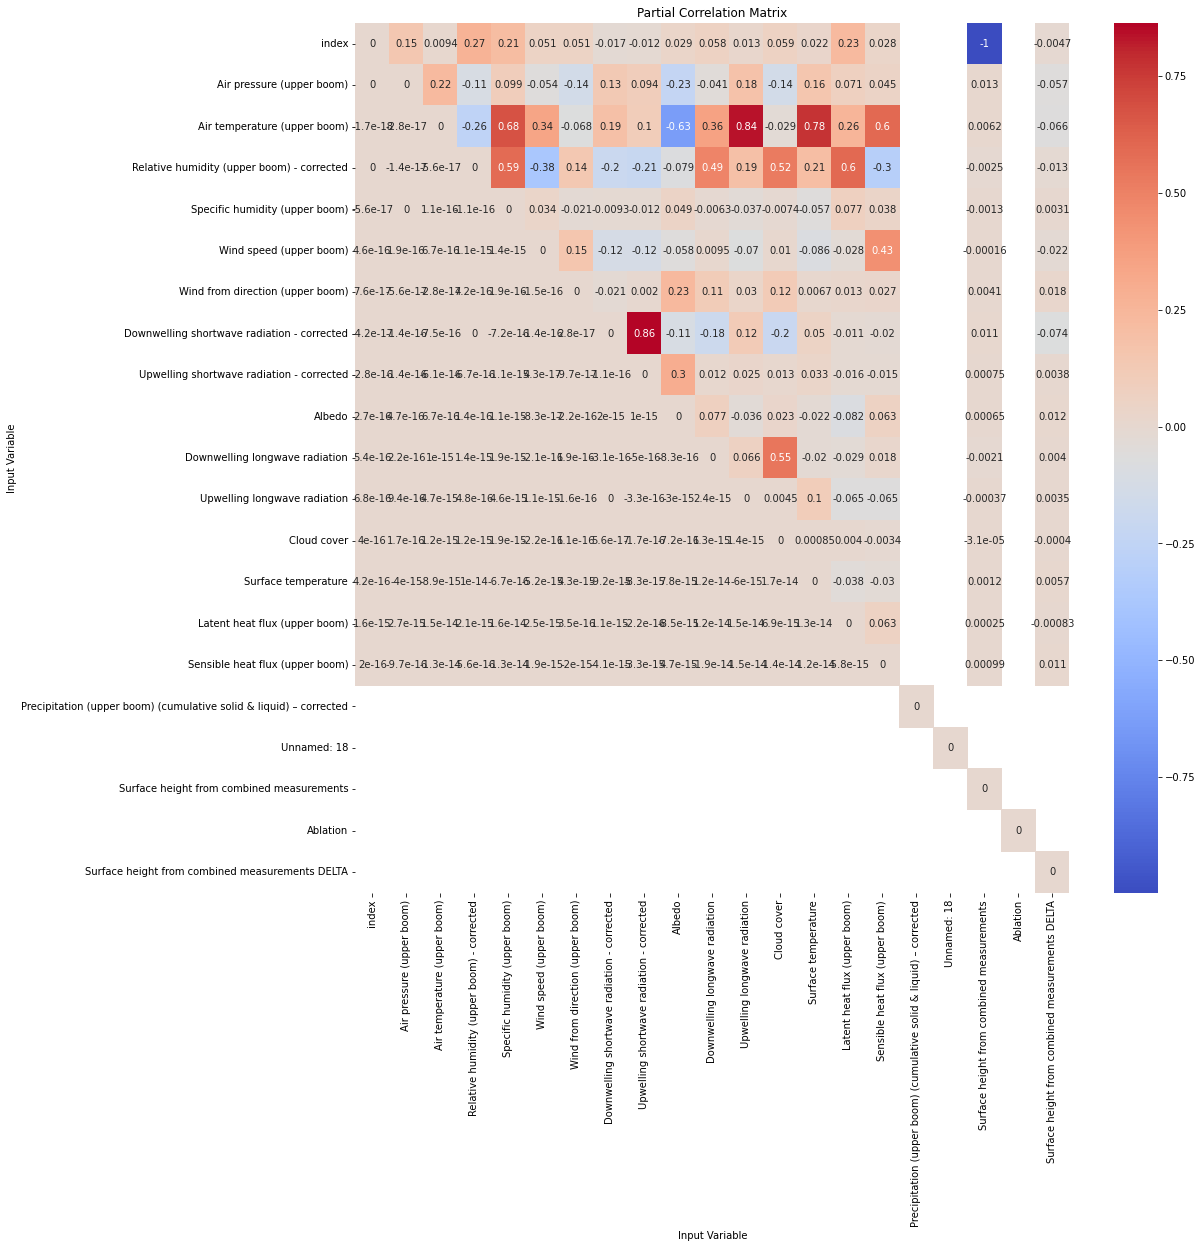

In [234]:
# The heatmap shows the partial correlation values between each input variable and the target variable,
# The partial correlation matrix is computed by subtracting the effects of all other input variables 
# from the correlation values, using the matrix inversion lemma

# Compute the correlation matrix between the input variables
corr_matrix = df.corr()

# Compute the partial correlation matrix between the input variables and the target variable
partial_corr_matrix = pd.DataFrame(np.zeros_like(corr_matrix), index=corr_matrix.index, columns=corr_matrix.columns)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if i != j:
            partial_corr_matrix.iloc[i, j] = (corr_matrix.iloc[i, j] - 
                                              corr_matrix.iloc[i, :i].dot(np.linalg.inv(corr_matrix.iloc[:i, :i])).dot(corr_matrix.iloc[:i, j]))

# Plot the partial correlation matrix
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(partial_corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xlabel('Input Variable')
ax.set_ylabel('Input Variable')
ax.set_title('Partial Correlation Matrix')

# Identify the input variables that are significantly correlated with the target variable
significant_vars = list(partial_corr_matrix[(partial_corr_matrix.abs() > 0.5) & (partial_corr_matrix != 1)].stack().index)
significant_vars = [(x, y) if x < y else (y, x) for (x, y) in significant_vars]

# Print the input variable pairs that are significantly correlated with the target variable
if significant_vars:
    print('Input variable pairs significantly correlated with the target variable:')
    for (var1, var2) in significant_vars:
        print(f'{var1} and {var2}')
else:
    print('No input variable pairs significantly correlated with the target variable.')

### Granger causaility

In [ ]:

from statsmodels.tsa.stattools import grangercausalitytests

# Run Granger causality test on each feature in X
causality_dict = {}
for col in X.columns:
    # Run Granger causality test with lag order 2
    result = grangercausalitytests(pd.concat([y, X[col]], axis=1), 2, verbose=False)
    # Extract F-test p-value from the result
    p_value = result[2][0]['ssr_ftest'][1]
    causality_dict[col] = p_value

# Sort the causality values in ascending order
causality_dict = {k: v for k, v in sorted(causality_dict.items(), key=lambda item: item[1])}

# Print the causality values
for col, p in causality_dict.items():
    print(f"{col}: {p}")

# Visualize the causality values
import matplotlib.pyplot as plt

# Sort the causality values in descending order for plotting
causality_dict = {k: v for k, v in sorted(causality_dict.items(), key=lambda item: item[1], reverse=True)}

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(causality_dict.keys()), list(causality_dict.values()))
ax.set_xlabel('p-value')
ax.set_title('Granger causality test')
plt.show()


In [ ]:
'''
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger causality analysis
maxlag = 365 # set the maximum lag to 365 (1 year)
results = {}
for col in X.columns:
    data = pd.concat([df[col], df["Surface height from combined measurements"]], axis=1)
    result = grangercausalitytests(data, maxlag=maxlag, verbose=False)
    results[col] = [result[i+1][0]["params_ftest"][1] for i in range(maxlag)]

# Print the p-values for each lag and variable
for col in results:
    print(f"{col}: {results[col]}")
'''

In [ ]:
# Perform restricted Granger causality analysis for a particular input variable
col = 'Albedo'
data = pd.concat([df[col], df["Surface height from combined measurements"]], axis=1)
result_restricted = grangercausalitytests(data, maxlag=maxlag, verbose=False, addconst=True)

# Perform unrestricted Granger causality analysis for the same input variable
data = pd.concat([df.drop(columns=[col]), df["Surface height from combined measurements"]], axis=1)
result_unrestricted = grangercausalitytests(data, maxlag=maxlag, verbose=False, addconst=True)

# Compare the p-values for the two models
p_restricted = result_restricted[maxlag][0]["params_ftest"][1]
p_unrestricted = result_unrestricted[maxlag][0]["params_ftest"][1]
if p_restricted > p_unrestricted:
    print(f"The past values of {col} improve the prediction of ice melt.")
else:
    print(f"The past values of {col} do not improve the prediction of ice melt.")